In [20]:
###' ################################################################################
###'
###' IMPORT LIBRARIES
###'
###'

### pandas and numpy
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

### punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import en_core_web_sm
nlp = en_core_web_sm.load()
import scattertext as st

### textblob
from textblob import TextBlob

### countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.manifold import TSNE

### gensim
import gensim
from gensim import models

### PCA
import random
from adjustText import adjust_text

### plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### kMeans and silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### ignore warnings
import warnings
warnings.filterwarnings('ignore')

###time
from datetime import datetime

# 1. DATA CLEANING

In [2]:
###' ################################################################################
###'
###' Data Load 
###'
###'

### daata load
df= pd.read_csv("data/7_124(2020-2024).csv")
df.head(5)


df_S = df[['Authors','Title','Year','Volume','Abstract']]
df_clean = df_S.dropna(subset = ['Title','Abstract'])

spell = SpellChecker()
df_clean['Title_spell'] = df_clean['Title'].map(lambda x: spell.correction(x))
df_clean['Abstract_spell'] = df_clean['Abstract'].map(lambda x: spell.correction(x))
df_clean.head(5)

,Authors,Title,Year,Volume,Abstract,Title_spell,Abstract_spell
0,Domingue B.W.; Kanopka K.; Stenhaug B.; Soland...,Variation in Respondent Speed and its Implicat...,2021,58.0,The more frequent collection of response time ...,Variation in Respondent Speed and its Implicat...,The more frequent collection of response time ...
1,Baldwin P.; Yaneva V.; Mee J.; Clauser B.E.; H...,Using Natural Language Processing to Predict I...,2021,58.0,"In this article, it is shown how item text can...",Using Natural Language Processing to Predict I...,"In this article, it is shown how item text can..."
2,Lim H.; Choe E.M.; Han K.T.,A Residual-Based Differential Item Functioning...,2022,59.0,Differential item functioning (DIF) of test it...,A Residual-Based Differential Item Functioning...,Differential item functioning (DIF) of test it...
3,Liao X.; Bolt D.M.; Kim J.-S.,Curvilinearity in the Reference Composite and ...,2024,NaN,Item difficulty and dimensionality often corre...,Curvilinearity in the Reference Composite and ...,Item difficulty and dimensionality often corre...
4,Kim S.Y.; Lee W.-C.,Several Variations of Simple-Structure MIRT Eq...,2023,60.0,The current study proposed several variants of...,Several Variations of Simple-Structure MIRT Eq...,The current study proposed several variants of...


In [3]:
###' ################################################################################
###'
###' Function for Deleteing Punctuations and StopWords
###'
###'

### define fuction
def rem_punc_stop(text):
    
    # when text is None
    if text is None:  
        return None
    
    # add more stop words
    stop_words = STOP_WORDS 
    nlp.Defaults.stop_words |= {"use","education","measurement","model","Education","Measurement","Model"}
    
    punc = set(punctuation)
    
    
    # remove the punctuation
    punc_free = "".join([ch for ch in text if ch not in punc])                                                               

    # apply nlp to punctuation-free object
    doc = nlp(punc_free)
    
    # lemmatize
    text_lemma = " ".join([word.lemma_ for word in doc])
    
    # extract words from processed text 
    spacy_words = text_lemma.split()
    spacy_words_1 = [word for word in spacy_words if not word.startswith(".")]
    spacy_words_2 = [word for word in spacy_words_1 if not word.startswith(".")]
    
    
    # filter out words 
    no_stop = [word for word in spacy_words_2 if word not in stop_words]
    
    # return
    return no_stop

In [4]:
###' ################################################################################
###'
###' Apply the Function and Tokenize Text Column
###'
###'

# tokenize
df_clean['A_tokens'] = df_clean['Abstract_spell'].map(lambda x: rem_punc_stop(x))
df_clean['T_tokens'] = df_clean['Title_spell'].map(lambda x: rem_punc_stop(x))

df_clean['A_tokens']
df_clean['T_tokens']

0      [Variation, Respondent, Speed, Implications, E...
1      [Natural, Language, Processing, Predict, Item,...
2      [ResidualBased, Differential, Item, Functionin...
3      [curvilinearity, Reference, Composite, Practic...
4          [Variations, SimpleStructure, MIRT, Equating]
                             ...                        
119    [link, PseudoEquivalent, Group, Design, Method...
120    [integrate, Multiple, Sources, Validity, Evide...
121    [statistical, Theoreticians, Educational, Asse...
122    [examine, Precision, Cut, Scores, Generalizabi...
123    [Bayesian, Extension, Biweight, Huber, Weight,...
Name: T_tokens, Length: 124, dtype: object

# 2. WORD CLOUDS

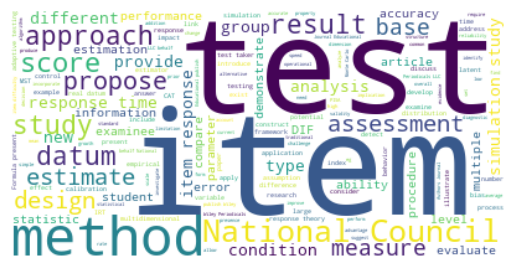

In [5]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###'
###'

### 1. Abstract

# apply function to text object
TO_text = ' '.join(df_clean['A_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()                              

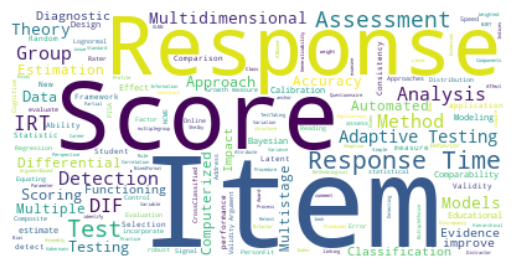

In [6]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###'
###'

### 2. Title

# apply function to text object
TO_text = ' '.join(df_clean['T_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()                              

# 3. WORDS FREQUENCY

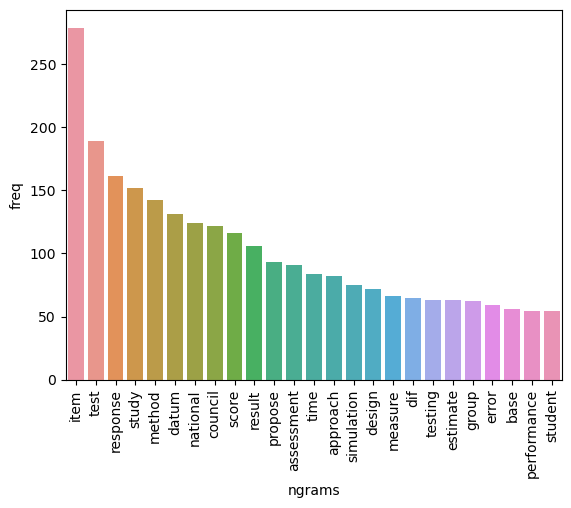

In [7]:
###' ################################################################################
###'
###' VISUALIZATION : WORDS COUNT
###' _ unigrams
###'
###'

### join token
df_clean['A_tokens_join'] = df_clean['A_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
df_clean['T_tokens_join'] = df_clean['T_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")


### most frequent unigrams _____ Abstract one word
countvec = CountVectorizer(min_df = 5, ngram_range=(1,1))
ngrams = countvec.fit_transform(df_clean['A_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

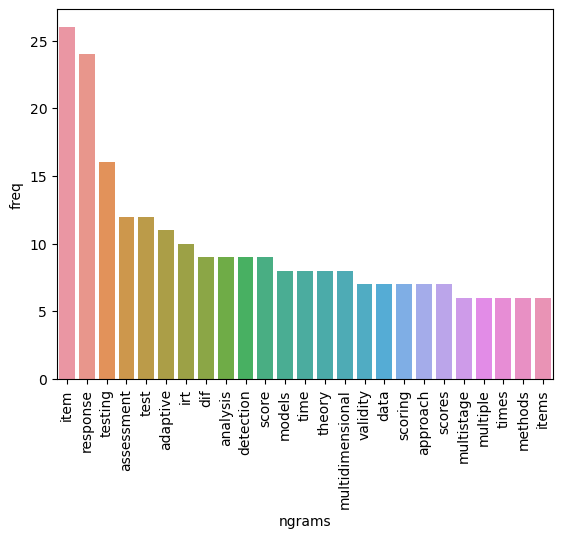

In [8]:
### most frequent unigrams  _____ Title one word
countvec = CountVectorizer(min_df = 5, ngram_range=(1,1))
ngrams = countvec.fit_transform(df_clean['T_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

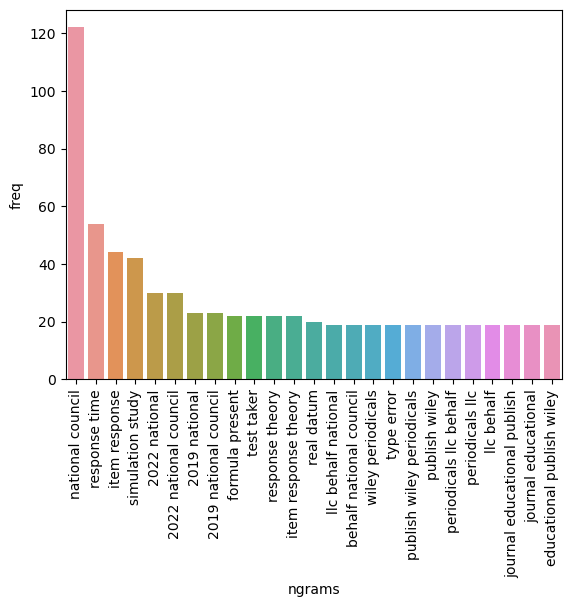

In [9]:
### most frequent bigrams _____ Abstract two words
countvec = CountVectorizer(min_df = 5, ngram_range=(2,3))
ngrams = countvec.fit_transform(df_clean['A_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

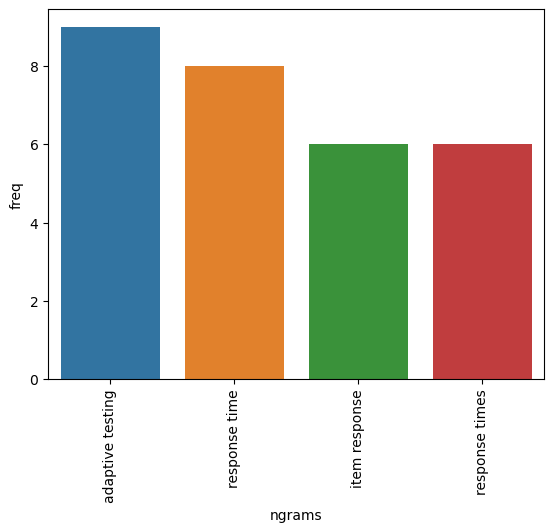

In [10]:
### most frequent bigrams _____ Abstract two words
countvec = CountVectorizer(min_df = 5, ngram_range=(2,3))
ngrams = countvec.fit_transform(df_clean['T_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

# 4. TOPIC MODELING

In [11]:
###' ################################################################################
###'
###' Topic Modeling : TD-IDF Matrix
###'
###'


### 1. Abstract

### create tf-idf matrix
tfidf = TfidfVectorizer(min_df = 5) 
tfidf_mx_a = tfidf.fit_transform(df_clean['A_tokens_join'])



### convert matrix to an arrray and then to a dataframe
tfidf_df_a = pd.DataFrame(data = tfidf_mx_a.toarray(),
                        columns = tfidf.get_feature_names_out())

## sort by term frequency on the first document
tfidf_df_a.T.nlargest(10,0)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
time,0.535514,0.329886,0.000000,0.000000,0.000000,0.0,0.089445,0.000000,0.491408,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
response,0.411083,0.153475,0.029729,0.000000,0.061845,0.0,0.124840,0.000000,0.000000,0.145484,...,0.000000,0.000000,0.00000,0.0,0.046265,0.000000,0.0,0.0,0.044368,0.207570
accuracy,0.351572,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.304580,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
low,0.208193,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.114773,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
additional,0.175670,0.000000,0.000000,0.000000,0.000000,0.0,0.146708,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
case,0.158024,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.102676,0.000000,0.000000,...,0.145714,0.130673,0.19714,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ability,0.156300,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.212485,0.000000,...,0.096084,0.000000,0.00000,0.0,0.000000,0.090063,0.0,0.0,0.000000,0.096459
increase,0.153439,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
lead,0.153439,0.000000,0.000000,0.108211,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.126882,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
behavior,0.142021,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.131470


In [12]:
###' ################################################################################
###'
###' Topic Modeling : Latent Dirichlet Allocation (LDA)
###'
###'


### define function
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nlda_{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    

In [13]:
# Latent Dirichlet Allocation (LDA)
# ---------------------------------------

# pre-processing
X = df_clean['A_tokens_join']

tf = TfidfVectorizer(tokenizer = rem_punc_stop,
                     token_pattern = None) 

tfidf_mx =  tf.fit_transform(X)

dense_matrix = tfidf_mx.todense()


# initialize LDA and set model parameters
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=20,  
                                random_state=0) 

# fit LDA model to our dense matrix
lda = lda.fit(numpy.asarray(dense_matrix))

# post-processing
tf_feature_names = tf.get_feature_names_out()

In [14]:
### print top words 
print_top_words(lda, tf_feature_names, 20)

### join
col_names = ['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4']
topic_dist = lda.transform(tfidf_mx)
topic_dist_lda = pd.DataFrame(lda.transform(tfidf_mx),
                              columns = col_names)


df_clean = df_clean.join(topic_dist_lda)


lda_0:
item group design method test response study datum parameter equate information approach result assessment propose multidimensional time error score different

lda_1:
item score response datum formula method assessment behavior dif aberrant classification provide difficulty sequential statistic educational study test example form

lda_2:
score method test scoring bias decision missingness measure impute automate procedure preregistration base approach item taker lead study dc rule

lda_3:
item test response approach time measure accuracy irt assessment score growth testing datum study index method dif group module ©

lda_4:
item rater performance time test method response prior propose datum estimator dif standard class estimate estimation design error tendency effect



In [15]:
###' ################################################################################
###'
###' Topic Modeling : on-Negative Matrix Factorization (NMF)
###'
###'


# pre-processing
Y = df_clean['A_tokens_join']

tf = TfidfVectorizer(tokenizer = rem_punc_stop,
                     token_pattern = None) 

tfidf_mx =  tf.fit_transform(Y)
dense_matrix = tfidf_mx.todense()


# initialize LDA and set model parameters
nmf = NMF(n_components=5,  # specify the number of components
          init='random',   # specify the initalization method
          random_state=1)  # set a seed for reproducibility

# fit NMF model to our dense matrix
nmf = nmf.fit(numpy.asarray(dense_matrix))

# post-processing
tf_feature_names = tf.get_feature_names_out()

In [16]:
### print top words 
print_top_words(nmf, tf_feature_names,20)  

### join
col_names2 = ['nmf_0', 'nmf_1', 'nmf_2', 'nmf_3', 'nmf_4']
topic_dist_nmf = pd.DataFrame(nmf.transform(tfidf_mx),
                              columns = col_names2)

df_clean = df_clean.join(topic_dist_nmf)


lda_0:
response time item speed datum preknowledge rt behavior ability study propose new educational student set condition journal behalf periodical author

lda_1:
test method item score link testing measure design mst calibration classification accuracy cat multiple adaptive consistency multidimensional decision estimate reliability

lda_2:
error equate statistic mean equating standard group design variance method smooth random score variability new judgment difference condition sample propose

lda_3:
scoring rater assessment automate score validity construct argument fairness engine effect ai aibase largescale provide different datum linkage connectedness approach

lda_4:
dif formula present type I uniform dbf item test ppmc differential size method function detection index power detect sum rdif



In [18]:
###' ################################################################################
###'
###' Word Embedding : Word2VecModel
###'
###'


### drop na
tweets_party = df_clean[df_clean['A_tokens'].notna()]

### Train Word2VecModel
model = gensim.models.Word2Vec(df_clean['A_tokens'].tolist(),
                               vector_size = 150, 
                               window = 5, 
                               min_count = 5, 
                               sg = 0, 
                               alpha = 0.025,
                               epochs = 5,
                               seed = 224,
                               batch_words = 10000,
                               workers = 1)

### return list of words
words = list(model.wv.index_to_key)
print(words[0:50]) 

['item', 'test', 'response', 'study', 'method', 'datum', 'National', '©', 'Council', 'score', 'result', 'propose', 'approach', 'time', 'assessment', 'design', 'simulation', 'measure', 'estimate', 'group', 'testing', 'error', 'base', 'performance', 'estimation', 'DIF', 'present', 'parameter', 'ability', 'condition', 'new', 'provide', 'student', 'compare', 'accuracy', 'evaluate', 'different', 'analysis', 'effect', 'information', 'examinee', '2022', 'empirical', 'statistic', 'IRT', 'latent', 'article', 'multiple', 'procedure', 'research']


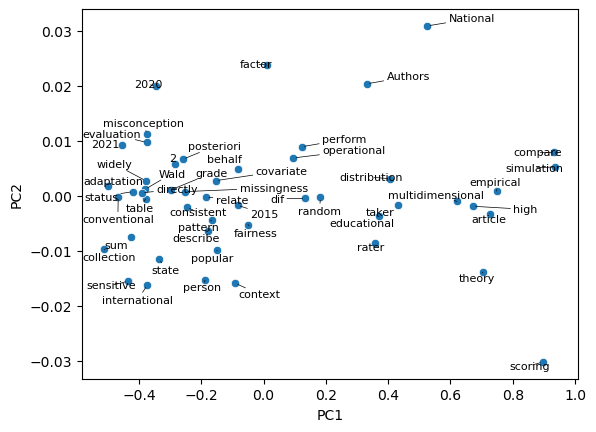

In [21]:
###' ################################################################################
###'
###' Word Embedding : Principal Component Analysis (PCA)
###'
###'


### take random sample
rando = random.sample(list(model.wv.index_to_key), 50) 
X1 = model.wv.__getitem__(rando)

### initalize PCA
pca1 = PCA(n_components=2)
result = pca1.fit_transform(X1)

### convert to dataframe 
result_df = pd.DataFrame(result,                  
                         columns = ['PC1', 'PC2'],
                         index = rando)   

### create scatterplot
sns.scatterplot(x = 'PC1',         # specify x-axis
                y = 'PC2',         # specify y-axis
                data = result_df)  # specify data

### initialize empty list
texts = []

### append words to list
for word in result_df.index:
    texts.append(plt.text(result_df.loc[word, 'PC1'], 
                          result_df.loc[word, 'PC2'], 
                          word, 
                          fontsize = 8))
    
### adjust plot text to prevent overlapping 
adjust_text(texts, 
            force_text = (0.4,0.4),
            expand = (1.2,1),
            arrowprops = dict(arrowstyle = "-", 
                              color = 'black', 
                              lw = 0.5))

### plot 
plt.show();

  File "D:\Program\ANACONDA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


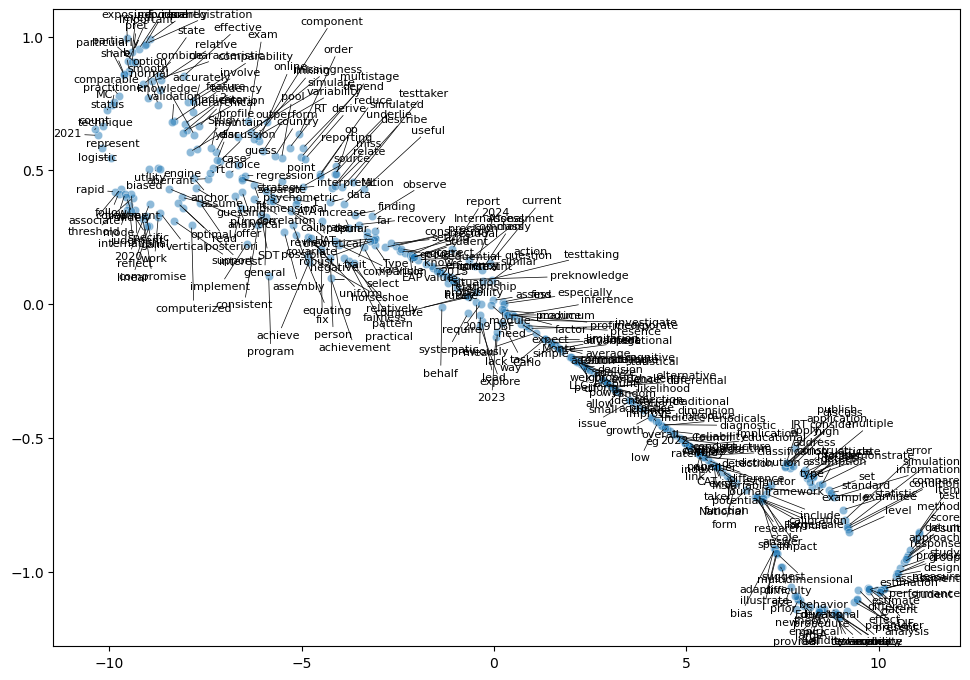

In [22]:
###' ################################################################################
###'
###' Word Embedding : t-SNE
###'
###'


### preprocessing
vector_list = [model.wv.__getitem__(word) for word in words if word in model.wv.index_to_key]
words_filtered = [word for word in words if word in model.wv.index_to_key]
word_vec_zip = zip(words_filtered, vector_list)


### create a dictionary and save as a dataframe
word_vec_dict = dict(word_vec_zip)
word_vec_df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
word_vec_df.shape


### initialize t-SNE
tsne = TSNE(n_components = 2,  # specify 2 components
            init = 'random',   # set initalization
            random_state = 10, # set seed
            perplexity = 100)  # set preplexity threshold


### subset to only 400 rows to speed up training time
tsne_df = tsne.fit_transform(word_vec_df[:400])


### figure specifications
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(x = tsne_df[:, 0], 
                y = tsne_df[:, 1], 
                alpha = 0.5)


### Convert tsne_df to DataFrame
tsne_df = pd.DataFrame(tsne_df, index=words_filtered[:400], columns=['PC1', 'PC2'])

### Initialize empty list
texts = []

### Append words to list using loop
for word in tsne_df.index:
    texts.append(plt.text(tsne_df.loc[word, 'PC1'], 
                          tsne_df.loc[word, 'PC2'], 
                          word, 
                          fontsize = 8))

### Adjust plot text to prevent overlapping 
adjust_text(texts, 
            force_text = (0.4,0.4),
            expand = (1.2,1),
            arrowprops = dict(arrowstyle = "-", 
                              color = 'black', 
                              lw = 0.5))

plt.show()

In [24]:
csv_file_path = 'data/7_output.csv'
df_clean.to_csv(csv_file_path, index=False)